## Machine learning model for predicting late recurrence of atrial fibrillation after catheter ablation 

In this Jupyter notebook, we're showing two examples of machine learning models predicting late recurrence of atrial fibrillation after catheter ablation.

Our goal is solve the classification task and predict the late recurrence of artial fibrillation within the time window of ??.

# About dataset

This dataset contains the following data:
@Filip: na opis czekamy od JB. Tutaj powinny być WSZYSTKIE ZMIENNE.

- Timestamp
- Age
- Gender
- state: If you live in the United States, which state or territory do you live in?
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?
- work_interfere: If you have a mental health condition, do you fe
- 

Due to the confidentiality of the dataset considered in this research, they are not allowed to be made publicly available. However, for illustrative purposes and to improve the reproducibility of this research, we present here 10 randomly selected items.

@Filip: prośba żeby w tych 10 był pacjent dla którego jest ilustracja z wartościami SHAP w artykule (ostatnia grafika).

@Filip: uprościłam nazwę modelu XGB. Ten plik musimy docelowo załadować razem z notebookiem. Muszę ustalić jeszcze gdzie ten notebook zapiszemy. Najlepiej chyba na serwerze IBS.


In [25]:
import xgboost
import pickle
with open('xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

In [26]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=15,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5294117647058822,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# About XGB model


All models presented in the article are trained on the complete dataset. 
We now present an example of a XGBoost model which was trained on the whole dataset. ## tutaj jest mała nieścisłość - modele były uczone na wydzielonej części treningowej w wielkości 90% całego zbioru.

The XGBoost model with 12 variables showed the best performance on the testing cohort, with the highest AUC of 0.75 [95% confidence interval 0.7395, 0.7653]. 

Based on the expertise of cardiologists, an additional variable (HAS-BLED score) was also included. 

# List of features selected for the XGB model:
- BMI
- Diastolic BP before
- ERAF
- Fibrinogen after
- Glucose mg/dl before
- HAS-BLED score
- HDL mg/dl before
- Hemoglobin after
- RBC 10e6/µl after
- Statin therapy
- TSH uIU/ml
- TroponinT_hs ng/ml after
- Urea mg/dl before


In [27]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=15,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2.5294117647058822,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# About Shapley Values


In order to get a better grasp on the detailed model's performance, we used SHAP (SHapley Additive exPlanations), which is a game theoretic approach to explain the output of any machine learning model. 

Firstly, we created a so-called beeswarm plot for our XGB model using the training set. On the vertical axis we see all the features, ranked in descending order of their impact on prediction, while the horizontal axis represents the SHAP value. The color of the point shows whether that particular observation has a higher/lower value, when compared to other observations. 

We can see, for example, that an early recurrence of atrial fibrillation (ERAF) has a positive impact on the prediction of LRAF.

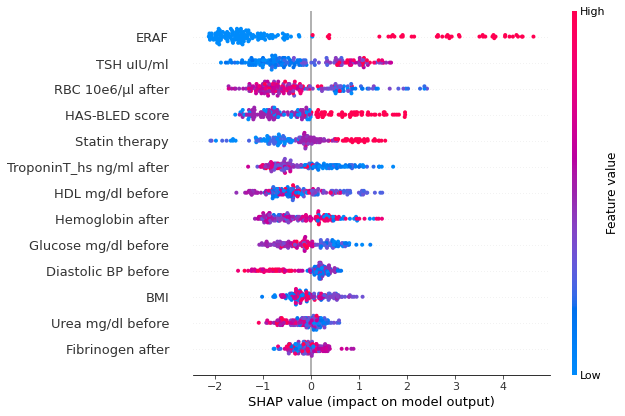

In [31]:
import shap
import pandas as pd

example_train_set = pd.read_csv("example_train_set.csv")

explainer = shap.Explainer(xgb_model)
shap_values_train = explainer(example_train_set)
shap.plots.beeswarm(shap_values_train, max_display = 13, show = False)

# About Local Explanations

Above, we have provided a global explanation for our model. To illustrate local results, we selected 10 patients at random from the test set. 

In [136]:
test_set, test_set_y = pd.read_csv("example_test_set_random.csv"), pd.read_csv("example_test_set_y_random.csv")
test_set_y = test_set_y.to_numpy().reshape((-1,))
test_set

,BMI,Fibrinogen after,Glucose mg/dl before,HDL mg/dl before,Hemoglobin after,ERAF,RBC 10e6/µl after,Diastolic BP before,Statin therapy,TSH uIU/ml,TroponinT_hs ng/ml after,Urea mg/dl before,HAS-BLED score
0,28.081600,366.0,106.0000,47.0000,12.2,0.0,3.94,75.0,18.656,1.560,0.769,30.0,1.0
1,25.476700,301.0,93.0000,60.0000,12.2,0.0,4.07,60.0,21.203,1.180,0.987,31.0,0.0
2,27.763430,286.0,96.0000,39.0000,13.6,1.0,4.40,75.0,0.000,1.280,0.313,46.0,2.0
3,26.753900,314.0,107.0000,74.0000,13.6,0.0,4.32,70.0,17.087,0.938,1.840,40.0,0.0
4,34.540542,416.0,103.1922,51.3092,15.5,1.0,5.41,98.0,0.000,1.190,0.254,35.0,1.0
5,30.071168,316.0,134.1847,52.6351,13.9,0.0,4.54,85.0,40.000,0.669,2.010,36.0,2.0
6,27.885200,298.0,98.2293,53.7635,12.7,0.0,3.86,70.0,16.517,0.729,0.571,34.0,2.0
7,33.800000,281.0,108.3411,57.5892,13.3,0.0,3.89,70.0,40.000,1.480,1.290,36.0,2.0
8,33.284024,281.0,102.0000,58.0000,12.8,0.0,3.80,85.0,20.000,0.755,0.812,42.0,1.0
9,32.031250,461.0,101.0000,86.0000,12.8,1.0,4.15,69.0,20.000,2.570,1.070,35.0,2.0


Using our model, we can predict late recurrence of atrial fibrillation for each of the chosen patients and create confusion matrix.

<AxesSubplot:>

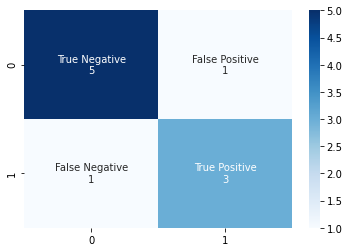

In [137]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns


pred = xgb_model.predict(test_set)
cf_matrix = confusion_matrix(test_set_y, pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

As we can see, the model provides satisfactory results. Let's take a closer look at misclassified patients. 

In [153]:
FP = np.array(np.where((test_set_y == 0) & (pred == 1))).tolist()[0][0]
FN = np.array(np.where((test_set_y == 1) & (pred == 0))).tolist()[0][0]

shap_example_test = explainer(example_test_set)

In order to show local explanations we used so-called waterfall plot that presents the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature. The bottom of a waterfall plot starts as the expected value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction.

For a false positive patient (prediction: +LRAF, ground truth: -LRAF) shown below we can see that the features mainly responsible for the incorrect prediction are RBC 10e6/µl after, HAS-BLED score and Statin therapy. 

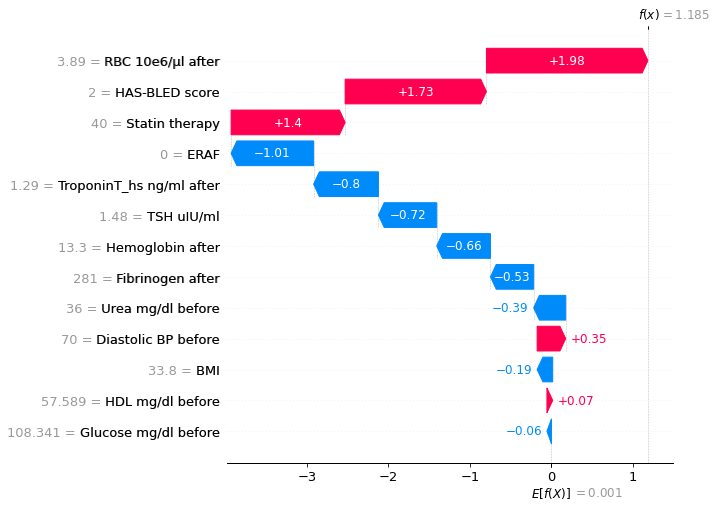

In [154]:
shap.plots.waterfall(shap_example_test[FP], max_display = 13)

Since waterfall plots only show a single sample worth of data, we can’t see the impact of changing any of above features. To see this we can use a scatter plot. 

Firstly, let's take a look at the plot for RBC 10e6/µl after. It shows how low values are a more positive predictor of LRAF that high values. For both HAS-BLED score and Statin therapy it is the opposite: high values are a more positive predictor of LRAF than low values.  So, for the false positive patient that we analyze the values of RBC 10e6/µl after, HAS-BLED score and Statin therapy highly indicated towards a positive value of LRAF.

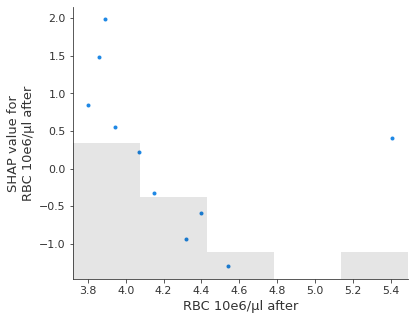

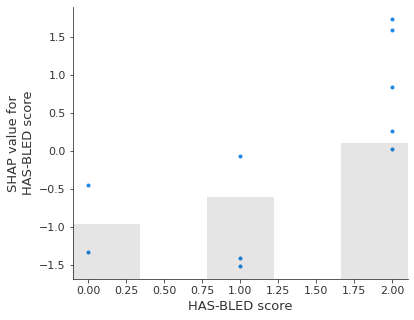

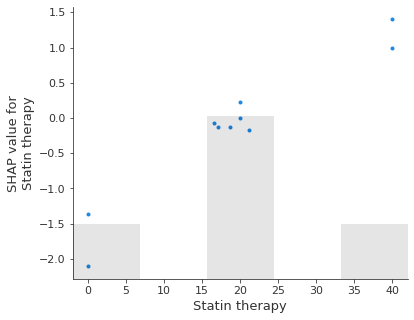

In [189]:
shap.plots.scatter(shap_example_test[:,"RBC 10e6/µl after"]),
shap.plots.scatter(shap_example_test[:,"HAS-BLED score"]),
shap.plots.scatter(shap_example_test[:,"Statin therapy"])

Now, let's check plots for a false negative patient (prediction: -LRAF, ground truth: +LRAF). As we can see below the features mainly responsible for the incorrect prediction are ERAF, TSH uIU/ml and Statin therapy. 

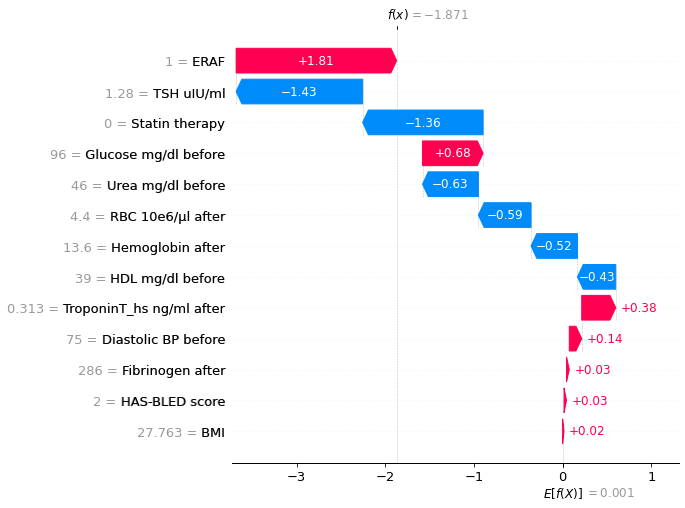

In [191]:
shap.plots.waterfall(shap_example_test[FN], max_display = 13)

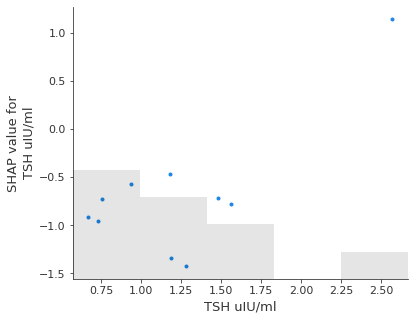

In [193]:
shap.plots.scatter(shap_example_test[:,"TSH uIU/ml"])

Although +ERAF is a strong predictor of +LRAF, low values of TSH uIU/ml and Statin therapy outweigh its impact for a false negative patient. 